
Objective of Problem :
You have to fit the data to a clustering model.

Find the number of clusters for the data.

Try fitting the model to both the clustering algorithms you have learnt,K-Means and Hierarchical clustering.

Which one suits this data better?

Your model should help the State authorities/Policy makers to understand how they can improve on their policies for employee benefits.

In [1]:
import pandas as pd
import numpy as np

In [2]:
missing_value = [np.nan, '__UNASSIGNED__', 'nan','NaN']

use_cols = ['Job Family Code', 'Is_Fiscal', 'Year', 'Org_gen_admin_finance',
       'Org_gen_admin', 'Org_general_city', 'Org_human', 'Org_pub_protection',
       'Org_Pub_work_trans', 'Union Code', 'Salaries', 'Overtime']


drop_cols = ['Job Code', 'Department Code', 'Department','Job Family', 
             'Job','Employee Identifier','Total Salary','Total Benefits',
             'Total Compensation', 'Union',"Organization Group","Year Type"]

In [3]:
drop_cols

['Job Code',
 'Department Code',
 'Department',
 'Job Family',
 'Job',
 'Employee Identifier',
 'Total Salary',
 'Total Benefits',
 'Total Compensation',
 'Union',
 'Organization Group',
 'Year Type']

In [4]:
data = pd.read_csv("./data/emp-comp.csv",na_values=missing_value)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683185 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [7]:
data.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [8]:
ori_col = data.columns
obj_col = []
for col in data.columns:
    if data[col].dtype == 'object':
        print(col)
        obj_col.append(col)

Job Family Code
Job Code
Year Type
Organization Group
Department Code
Department
Union
Job Family
Job


In [9]:
for c in obj_col:
    print(f"{c}\n{data[c].unique()}\n")


Job Family Code
['1000' '1200' '1600' '1800' '1400' '0900' '8400' '9700' '9900' 'SCRT'
 '8100' '1500' '5200' '8200' '8600' '2500' '1900' '6200' '2200' '2100'
 '2300' 'H000' 'Q000' '7100' '7200' '7300' '2600' '2700' '7500' '8300'
 '2900' '1300' '7400' '1700' '3300' '9200' '3400' '2400' '5100' '5300'
 '5500' '5600' '6100' '6300' '9300' '3500' '3600' '4300' '5400' '9100'
 '4100' '2800' '4200' '1100' '3200' 'SFRA' '0000' nan '9500' 9200.0 7300.0
 900.0 1000.0 1200.0 1300.0 1600.0 1800.0 1900.0 2400.0 5100.0 5200.0
 5300.0 5500.0 5600.0 6100.0 6300.0 7400.0 1400.0 8100.0 6200.0 7200.0
 9300.0 9100.0 2700.0 3500.0 3400.0 7500.0 0.0 9700.0 1700.0 2600.0 9900.0
 1500.0 4300.0 7100.0 5400.0 2900.0 8200.0 3600.0 9500.0 4100.0 3200.0
 3300.0 2500.0 2800.0 4200.0 8600.0 2200.0 2100.0 2300.0 1100.0]

Job Code
['1021' '1023' '1031' ... '1302' '1306' '0881']

Year Type
['Calendar' 'Fiscal']

Organization Group
['Public Protection' 'Public Works, Transportation & Commerce'
 'Human Welfare & Neighborho

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

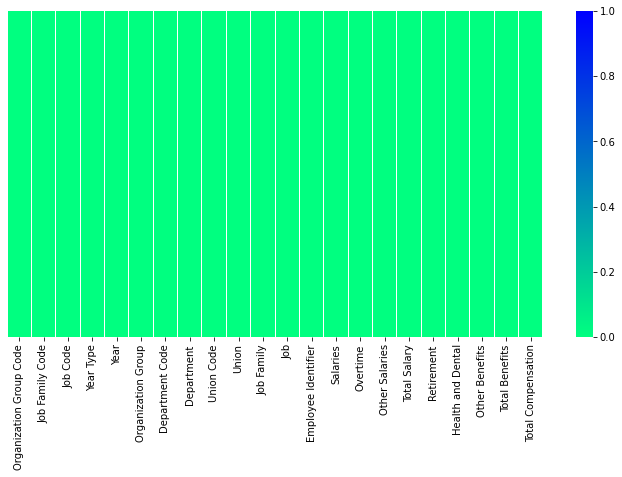

In [11]:
plt.figure(figsize=(12,6))
sns.heatmap(data.isna(),yticklabels=False, cmap='winter_r')

FEATURE BY FEQATURE 

In [12]:
# ori_data = data.copy()
# df = pd.DataFrame()

## Organization Group Code Org Group is a group of Departments. 

### For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.

In [13]:
data[ori_col[0]]

0         1
1         1
2         1
3         1
4         1
         ..
683272    6
683273    6
683274    6
683275    6
683276    6
Name: Organization Group Code, Length: 683277, dtype: int64

In [14]:
data[ori_col[0]].describe()

count    683277.000000
mean          2.977943
std           1.579574
min           1.000000
25%           2.000000
50%           2.000000
75%           4.000000
max           7.000000
Name: Organization Group Code, dtype: float64

In [15]:
data[ori_col[0]].value_counts()

2    215770
4    150122
1    130982
6     62123
5     62118
3     61678
7       484
Name: Organization Group Code, dtype: int64

In [16]:
data[ori_col[0]].isna().sum()

0

<Figure size 1152x288 with 0 Axes>

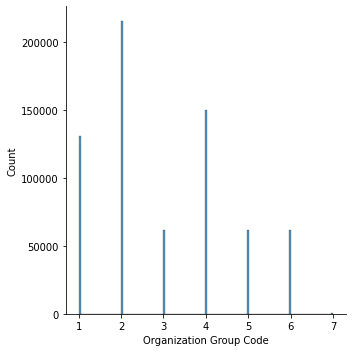

In [17]:
plt.figure(figsize=(16,4))
sns.displot(data=data,x=data[ori_col[0]],kind="hist")
plt.show()

In [18]:
new_cols = []

In [19]:
# df[ori_col[0]] = data[ori_col[0]]

new_cols.append(ori_col[0])

In [20]:
def desc_feat(data, colname):
    print('*'*35)
    print(colname)
    temp = data[colname]
    print("Describe \n")
    print(temp.describe())
    print("Value Count \n")
    print(temp.value_counts())
    print("Amount of NuLL:")
    print(temp.isna().sum())
    #print("info \ng")
    #temp.info()
    print('*'*35)
    

### Job Family Code

#### Job Family combines similar Jobs into meaningful groups.



In [21]:
desc_feat(data,ori_col[1])

***********************************
Job Family Code
Describe 

count     683185
unique       110
top         2300
freq       61851
Name: Job Family Code, dtype: object
Value Count 

2300      61851
9100      50006
Q000      42326
7300      36397
2900      30506
          ...  
9300.0       27
5400.0       24
1100.0       22
8600.0        6
1500.0        6
Name: Job Family Code, Length: 110, dtype: int64
Amount of NuLL:
92
***********************************


SFRA - 121

Q000 - 42326

UNASSIGNED - 92

SCRT - 5323


Drop Unasigned


In [22]:
df_jfc = pd.DataFrame()
df_jfc[ori_col[1]] = data[ori_col[1]]
#df_jfc[ori_col[1]] = data[ori_col[1]]
df_jfc.value_counts()

Job Family Code
2300               61851
9100               50006
Q000               42326
7300               36397
2900               30506
                   ...  
9300.0                27
5400.0                24
1100.0                22
8600.0                 6
1500.0                 6
Length: 110, dtype: int64

In [23]:
len(df_jfc)

683277

In [24]:
# df_jfc[df_jfc[ori_col[1]] == "__UNASSIGNED__"].index

df_jfc

,Job Family Code
0,1000
1,1000
2,1000
3,1000
4,1000
...,...
683272,4300.0
683273,4300.0
683274,4300.0
683275,4300.0


In [25]:
# df_jfc = df_jfc.drop(df_jfc == "__UNASSIGNED__".index)

df_jfc[df_jfc != "__UNASSIGNED__"].count()


Job Family Code    683185
dtype: int64

In [26]:
# data = data.drop(data[ori_col[1] == "__UNASSIGNED__"].index,0)


In [27]:
len(data)

683277

before: 683277 

after: 683185

next convert the others into numbers(5digit)

In [28]:
df_jfc

,Job Family Code
0,1000
1,1000
2,1000
3,1000
4,1000
...,...
683272,4300.0
683273,4300.0
683274,4300.0
683275,4300.0


In [29]:
j = 1 
SCRT = 1111
H000 = 2222
Q000 = 3333
SFRA = 4444

df_jfc.loc[df_jfc[ori_col[1]] ==  "SCRT", ori_col[1]] = str(SCRT)
df_jfc.loc[df_jfc[ori_col[1]] ==  "H000", ori_col[1]] = str(H000)
df_jfc.loc[df_jfc[ori_col[1]] ==  "Q000", ori_col[1]] = str(Q000)
df_jfc.loc[df_jfc[ori_col[1]] ==  "SFRA", ori_col[1]] = str(SFRA)


for i in df_jfc.loc[:,ori_col[1]]:
    if i == "SCRT":
        print(i)
    if type(i) != float:
        pass
        

In [30]:
j = 1 
SCRT = 1111
H000 = 2222
Q000 = 3333
SFRA = 4444

data.loc[data[ori_col[1]] ==  "SCRT", ori_col[1]] = str(SCRT)
data.loc[data[ori_col[1]] ==  "H000", ori_col[1]] = str(H000)
data.loc[data[ori_col[1]] ==  "Q000", ori_col[1]] = str(Q000)
data.loc[data[ori_col[1]] ==  "SFRA", ori_col[1]] = str(SFRA)


for i in data.loc[:,ori_col[1]]:
    if i == "SCRT":
        print(i)
    if type(i) != float:
        pass
        

In [31]:
df_jfc["Job Family Code"].value_counts()

2300      61851
9100      50006
3333      42326
7300      36397
2900      30506
          ...  
9300.0       27
5400.0       24
1100.0       22
8600.0        6
1500.0        6
Name: Job Family Code, Length: 110, dtype: int64

In [32]:
df_jfc["Job Family Code"].unique()

array(['1000', '1200', '1600', '1800', '1400', '0900', '8400', '9700',
       '9900', '1111', '8100', '1500', '5200', '8200', '8600', '2500',
       '1900', '6200', '2200', '2100', '2300', '2222', '3333', '7100',
       '7200', '7300', '2600', '2700', '7500', '8300', '2900', '1300',
       '7400', '1700', '3300', '9200', '3400', '2400', '5100', '5300',
       '5500', '5600', '6100', '6300', '9300', '3500', '3600', '4300',
       '5400', '9100', '4100', '2800', '4200', '1100', '3200', '4444',
       '0000', nan, '9500', 9200.0, 7300.0, 900.0, 1000.0, 1200.0, 1300.0,
       1600.0, 1800.0, 1900.0, 2400.0, 5100.0, 5200.0, 5300.0, 5500.0,
       5600.0, 6100.0, 6300.0, 7400.0, 1400.0, 8100.0, 6200.0, 7200.0,
       9300.0, 9100.0, 2700.0, 3500.0, 3400.0, 7500.0, 0.0, 9700.0,
       1700.0, 2600.0, 9900.0, 1500.0, 4300.0, 7100.0, 5400.0, 2900.0,
       8200.0, 3600.0, 9500.0, 4100.0, 3200.0, 3300.0, 2500.0, 2800.0,
       4200.0, 8600.0, 2200.0, 2100.0, 2300.0, 1100.0], dtype=object)

In [33]:
j = df_jfc[df_jfc["Job Family Code"].isna() == True].index


In [34]:
data = data.drop(j,0)

In [35]:
df_jfc = df_jfc.drop(j,0)

In [36]:
data

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683272,6,4300.0,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43836214,98444.94,0.0,0.00,98444.94,20540.24,15275.18,8019.49,43834.91,142279.85
683273,6,4300.0,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43966403,9416.71,0.0,0.00,9416.71,1904.43,1468.77,743.51,4116.71,13533.42
683274,6,4300.0,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,44016180,96475.00,0.0,576.00,97051.00,20241.56,14100.16,7897.00,42238.72,139289.72
683275,6,4300.0,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42423439,115943.00,0.0,0.00,115943.00,24188.37,15275.18,9018.34,48481.89,164424.89


In [37]:
data["Job Family Code"] = data["Job Family Code"].astype(int)

In [38]:
data.head()

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [39]:
# df['Organization Group Code'] = data['Organization Group Code']

### Job Code


#### Job Code Jobs are defined by the Human Resources classification unit. Examples include gardeners, police officers, and accountants.



In [40]:
desc_feat(data,ori_col[2])

***********************************
Job Code
Describe 

count     683185
unique      1210
top         9163
freq       43373
Name: Job Code, dtype: object
Value Count 

9163    43373
P103    25285
2320    21954
H002    14038
9910    13690
        ...  
980C        1
7352        1
8586        1
201C        1
3379        1
Name: Job Code, Length: 1210, dtype: int64
Amount of NuLL:
0
***********************************


Maybe too many indivual values to account for

In [41]:
# drop_cols.append("Job Code")

### Year Type


#### Year Type Fiscal (July through June) or Calendar (January through December)



In [42]:
desc_feat(data,ori_col[3])

***********************************
Year Type
Describe 

count     683185
unique         2
top       Fiscal
freq      385061
Name: Year Type, dtype: object
Value Count 

Fiscal      385061
Calendar    298124
Name: Year Type, dtype: int64
Amount of NuLL:
0
***********************************


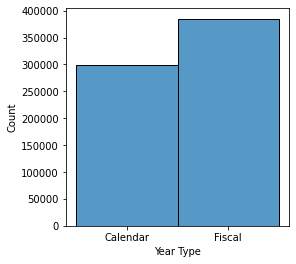

In [43]:
plt.figure(figsize=(4,4))
sns.histplot(data=data, x=ori_col[3],)
plt.show()


In [44]:
def show_dfs():
    print("="*20,"Data","="*20)
    print(data.head())
    print("="*20,"DF","="*20)
    print(df.head())
    

### Year

#### Year An accounting period of 12 months. The City and County of San Francisco operates on a fiscal year that begins on July 1 and ends on June 30 the following year. The Fiscal Year ending June 30, 2012 is represented as FY2011-2012.

In [45]:
desc_feat(data,ori_col[4])

***********************************
Year
Describe 

count    683185.000000
mean       2016.364371
std           2.092166
min        2013.000000
25%        2015.000000
50%        2017.000000
75%        2018.000000
max        2020.000000
Name: Year, dtype: float64
Value Count 

2017    129968
2019     89026
2016     88478
2015     86067
2018     85612
2014     82291
2013     79380
2020     42363
Name: Year, dtype: int64
Amount of NuLL:
0
***********************************


<Figure size 1152x288 with 0 Axes>

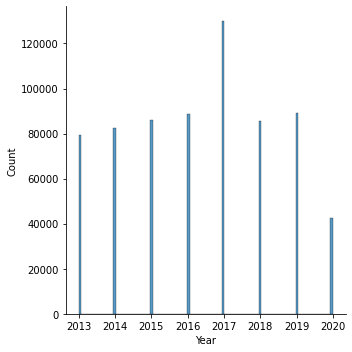

In [46]:
plt.figure(figsize=(16,4))
sns.displot(data=data,x=data[ori_col[4]],kind="hist")
plt.show()

### Organization Group

#### Organization Group Code Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.

In [47]:
desc_feat(data,ori_col[5])

***********************************
Organization Group
Describe 

count                                      683185
unique                                          7
top       Public Works, Transportation & Commerce
freq                                       215732
Name: Organization Group, dtype: object
Value Count 

Public Works, Transportation & Commerce     215732
Community Health                            150122
Public Protection                           130982
Culture & Recreation                         62118
General Administration & Finance             62069
Human Welfare & Neighborhood Development     61678
General City Responsibilities                  484
Name: Organization Group, dtype: int64
Amount of NuLL:
0
***********************************


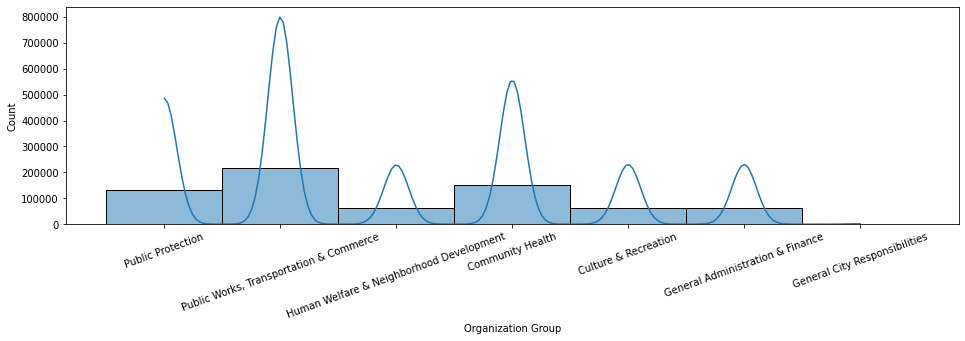

In [48]:
plt.figure(figsize=(16,4))
sns.histplot(data=data, x = ori_col[5],kde=True)
plt.xticks(rotation=20)

plt.show()

### Department Code 

#### Departments Code are the primary organizational unit used by the City and County of San Francisco. Examples include



In [49]:
desc_feat(data,ori_col[6])

***********************************
Department Code
Describe 

count     683183
unique        60
top          DPH
freq      150122
Name: Department Code, dtype: object
Value Count 

DPH    150122
MTA    101886
POL     53140
REC     38745
DSS     34606
AIR     31808
FIR     29539
DPW     26679
PUC     26431
HSA     19559
SHF     17781
ADM     17417
LIB     15608
CRT      8943
WTR      7623
CWP      5399
CAT      5373
DAT      5249
DBI      5111
REG      5072
CON      5033
JUV      5025
TIS      4927
HRD      4852
PRT      4769
CPC      4526
TTX      3954
FAM      3865
HHP      3808
PDR      3142
ASR      3110
ECD      3015
ADP      2848
MYR      2308
ENV      2108
ECN      2042
DEM      2013
BOS      1980
RET      1799
WAR      1605
CSS      1441
AAM      1298
HSS      1193
HOM      1154
CHF      1068
RNT       747
ART       742
UNA       482
HRC       453
ETH       343
DPA       287
CFC       271
WOM       245
SCI       221
CSC       182
PAB       111
BOA        35
LLB        34
CLP   

In [50]:
tem = data[data[ori_col[6]].isna() == True].index
data = data.drop(data[data[ori_col[6]].isna() == True].index, 0)

In [51]:
desc_feat(data,ori_col[7])

***********************************
Department
Describe 

count                683183
unique                  109
top       DPH Public Health
freq                  82869
Name: Department, dtype: object
Value Count 

DPH Public Health                 82869
Public Health                     67253
MTA Municipal Transprtn Agncy     55856
Municipal Transportation Agcy     46030
HSA Human Services Agency         31290
                                  ...  
HHP CleanPowerSF                     30
CII Commty Invest & Infrstrctr       26
LLB Law Library                      20
Law Library                          14
Board of Appeals                      5
Name: Department, Length: 109, dtype: int64
Amount of NuLL:
0
***********************************


In [52]:
#department = zip(data[ori_col[7]],data[ori_col[6]])
#drop_cols.append([ori_col[6],ori_col[7]])


In [53]:
drop_cols

['Job Code',
 'Department Code',
 'Department',
 'Job Family',
 'Job',
 'Employee Identifier',
 'Total Salary',
 'Total Benefits',
 'Total Compensation',
 'Union',
 'Organization Group',
 'Year Type']

## DEPARTMENT/Department Code could be zipped 
## code can be numeralized
## should i turn it into a dummy?

# ============================+

### Union Code 

#### represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).

In [54]:
desc_feat(data,ori_col[8])

***********************************
Union Code
Describe 

count    682832.000000
mean        492.549125
std         330.922535
min           1.000000
25%         250.000000
50%         535.000000
75%         790.000000
max         990.000000
Name: Union Code, dtype: float64
Value Count 

790.0    193982
21.0      88657
791.0     52731
253.0     43373
911.0     42543
          ...  
220.0        34
969.0        22
302.0        17
357.0        15
604.0        12
Name: Union Code, Length: 70, dtype: int64
Amount of NuLL:
351
***********************************


In [55]:
## What should we do with null values

### mean,median,or delete

### lets try mean first

In [56]:
df_union = pd.DataFrame()
df_union[ori_col[8]] = data[ori_col[8]]
df_union[ori_col[8]].isna().value_counts()

False    682832
True        351
Name: Union Code, dtype: int64

In [57]:
df_union[ori_col[8]].mean()

492.5491248213323

In [58]:
df_union[ori_col[8]].unique()

array([ 21.,  22., 351., 651., 790., 965.,  23., 121., 191., 195., 196.,
       197., 356., 792., 933.,   2., 311., 419., 556.,   1., 163., 164.,
       323., 352., 791., 793., 798., 799., 911.,  39., 250., 535., 856.,
       200., 252., 353.,   6.,  38., 261., 498., 499., 969.,   3.,   4.,
         7., 104., 130., 216., 236., 251., 930., 929.,  12.,  36., 253.,
       580., 718., 254., 302.,  34.,  40., 377., 604., 330., 990., 858.,
        16., 220., 257.,  nan, 357.])

In [59]:

df_union[ori_col[8]].fillna(round(df_union[ori_col[8]].mean()), inplace=True)

In [60]:
data[ori_col[8]].fillna(round(data[ori_col[8]].mean()), inplace=True)

In [61]:
df_union[ori_col[8]].unique()

array([ 21.,  22., 351., 651., 790., 965.,  23., 121., 191., 195., 196.,
       197., 356., 792., 933.,   2., 311., 419., 556.,   1., 163., 164.,
       323., 352., 791., 793., 798., 799., 911.,  39., 250., 535., 856.,
       200., 252., 353.,   6.,  38., 261., 498., 499., 969.,   3.,   4.,
         7., 104., 130., 216., 236., 251., 930., 929.,  12.,  36., 253.,
       580., 718., 254., 302.,  34.,  40., 377., 604., 330., 990., 858.,
        16., 220., 257., 493., 357.])

In [62]:
# df[ori_col[8]] = df_union[ori_col[8]]

In [64]:
#show_dfs()

In [65]:
desc_feat(data,ori_col[9])

***********************************
Union
Describe 

count                     682832
unique                       129
top       SEIU, Local 1021, Misc
freq                      115489
Name: Union, dtype: object
Value Count 

SEIU, Local 1021, Misc                             115489
SEIU - Miscellaneous, Local 1021                   108284
Prof & Tech Engineers - Miscellaneous, Local 21     48814
Prof & Tech Eng, Local 21                           43420
SEIU - Staff and Per Diem Nurses, Local 1021        28721
                                                    ...  
Port Director                                          12
Management Unrepresented Employees - MTA                9
Indv. Employment Contract-MTA                           8
TWU Local 200                                           7
SFIPOA, Op Eng, Local 3                                 7
Name: Union, Length: 129, dtype: int64
Amount of NuLL:
351
***********************************


### zip union with code

### Job Family 

#### Job Family combines similar Jobs into meaningful groups.



In [66]:
desc_feat(data,ori_col[10])

***********************************
Job Family
Describe 

count      683183
unique         58
top       Nursing
freq        71080
Name: Job Family, dtype: object
Value Count 

Nursing                           71080
Street Transit                    57142
Police Services                   42325
Journeyman Trade                  39921
Human Services                    35101
Public Service Aide               31968
Clerical, Secretarial & Steno     29628
Fire Services                     28048
Housekeeping & Laundry            22202
Management                        21101
Recreation                        20359
Budget, Admn & Stats Analysis     20283
Protection & Apprehension         20060
Professional Engineering          19828
Correction & Detention            18160
Information Systems               16777
Legal & Court                     15243
Med Therapy & Auxiliary           14145
Payroll, Billing & Accounting     13651
Library                           12449
Lab, Pharmacy & Med Tech

### Job

#### Jobs are defined by the Human Resources classification unit. Examples include gardeners, police officers, and accountants.



In [67]:
desc_feat(data,ori_col[11])

***********************************
Job
Describe 

count               683178
unique                1349
top       Transit Operator
freq                 43373
Name: Job, dtype: object
Value Count 

Transit Operator                 43373
Special Nurse                    25285
Registered Nurse                 21954
Firefighter                      14038
Public Service Trainee           13690
                                 ...  
Bail Commissioner                    1
Mobile Equipment Supervisor          1
Sr Sprvg Institut Mgr (PERS)         1
Mayoral Staff I                      1
Exec Asst to Airport Director        1
Name: Job, Length: 1349, dtype: int64
Amount of NuLL:
5
***********************************


### TOO MANY DIFFERENT CAT SHOULD I DROP

### DROP THE 5 NULL

In [68]:
# df[ori_col[11]] = data[ori_col[11]]

In [69]:
# df = df.drop(df[df[ori_col[11]] == "__UNASSIGNED__"].index)

#df.drop(df.loc[ori_col[11]] , inplace=True )

In [70]:
# for i in df[ori_col[11]].unique():
#     print(i)

In [71]:
# drop_cols.append([ori_col[10], ori_col[11]])

In [72]:
drop_cols

['Job Code',
 'Department Code',
 'Department',
 'Job Family',
 'Job',
 'Employee Identifier',
 'Total Salary',
 'Total Benefits',
 'Total Compensation',
 'Union',
 'Organization Group',
 'Year Type']

### Employee Identifier 


#### Each distinct number in the “Employee Identifier” column represents one employee. These identifying numbers are not meaningful but rather are randomly assigned for the purpose of building this dataset. The column does not appear on the Employee Compensation report hosted on openbook.sfgov.org, but that report does show one row for each employee. Employee ID has been included here to allow users to reconstruct the original report. Note that each employee’s identifier will change each time this dataset is updated, so comparisons by employee across multiple versions of the dataset are not possible.

In [73]:
desc_feat(data,ori_col[12])

***********************************
Employee Identifier
Describe 

count    6.831830e+05
mean     1.708420e+07
std      1.925873e+07
min      0.000000e+00
25%      2.544700e+04
50%      5.096900e+04
75%      3.737701e+07
max      4.434643e+07
Name: Employee Identifier, dtype: float64
Value Count 

0           40
43227       23
7041        22
52786       22
30585       22
            ..
39236100     1
36858808     1
37106196     1
37102102     1
37595828     1
Name: Employee Identifier, Length: 309691, dtype: int64
Amount of NuLL:
0
***********************************


In [74]:
# drop_cols.append("Employee Identifier")

# NOT NEEDED

### Salaries 
##  Normal salaries paid to permanent or temporary City employees.



In [75]:
desc_feat(data,ori_col[13])

***********************************
Salaries
Describe 

count    683183.000000
mean      69455.665822
std       47722.358001
min      -68771.780000
25%       29013.875000
50%       67898.630000
75%      100416.675000
max      651936.710000
Name: Salaries, dtype: float64
Value Count 

0.00         11680
61603.00       389
56531.00       388
60706.00       346
54703.00       338
             ...  
123029.83        1
142400.30        1
145105.20        1
53842.15         1
3077.27          1
Name: Salaries, Length: 498456, dtype: int64
Amount of NuLL:
0
***********************************


In [76]:
# data[data[ori_col[13]] < 29013.875000]

In [77]:
# delete - records

In [78]:
df_salary = pd.DataFrame()
df_salary[ori_col[13]] = data[ori_col[13]]

#df_salary.min()

In [79]:
min_sal = int(df_salary.mean()) - int(df_salary.std()) * 1
max_sal = int(df_salary.mean()) + int(df_salary.std()) * 2

df_salary = df_salary[df_salary[ori_col[13]] > min_sal]
df_salary = df_salary[df_salary[ori_col[13]] < max_sal]

In [80]:
df_salary = df_salary[df_salary[ori_col[13]] > min_sal]
df_salary = df_salary[df_salary[ori_col[13]] < max_sal]

In [81]:
df_salary.describe()

,Salaries
count,515705.00000
mean,82185.11060
std,32955.86177
min,21733.35000
25%,58698.73000
50%,78028.00000
75%,106427.92000
max,164898.90000


In [82]:
data = data[data[ori_col[13]] > min_sal]
data = data[data[ori_col[13]] < max_sal]

In [83]:
data.describe()

,Organization Group Code,Job Family Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,515705.000000,515705.000000,515705.000000,515705.000000,5.157050e+05,515705.00000,515705.000000,515705.000000,515705.000000,515705.000000,515705.000000,515705.000000,515705.000000,515705.000000
mean,2.823302,4365.477125,2016.397883,476.588018,1.751440e+07,82185.11060,7054.838182,4426.307054,93507.135537,16372.382991,12158.791646,6024.567739,34555.742375,128062.877913
std,1.553556,2865.930067,2.093230,333.385804,1.932456e+07,32955.86177,14501.186910,8223.742865,42324.012421,7387.845230,3926.120162,3154.675524,11901.522605,52234.373820
min,1.000000,0.000000,2013.000000,1.000000,0.000000e+00,21733.35000,-12308.660000,-19131.100000,21594.070000,-29629.210000,-193.950000,-10636.500000,-19411.610000,12817.580000
25%,2.000000,2222.000000,2015.000000,200.000000,2.593400e+04,58698.73000,0.000000,0.000000,63274.850000,11893.230000,11406.100000,3538.400000,28993.450000,92380.300000
50%,2.000000,2900.000000,2017.000000,535.000000,5.196100e+04,78028.00000,337.940000,1424.000000,86700.050000,15876.150000,13054.930000,5815.130000,35572.120000,122371.930000
75%,4.000000,7300.000000,2018.000000,790.000000,3.746011e+07,106427.92000,7529.150000,5709.820000,119776.180000,21207.220000,14451.010000,8020.060000,42145.060000,162774.410000
max,7.000000,9900.000000,2020.000000,990.000000,4.434639e+07,164898.90000,321523.310000,568163.120000,473094.950000,70052.970000,44921.800000,35937.500000,96583.250000,554929.290000


In [84]:
# # df = df.drop(df[df[ori_col[11]] == "__UNASSIGNED__"].index)


# #df_salary = 
# df_salary = df_salary.drop(df_salary[df_salary[ori_col[13]] <= min_sal].index,0)
# data = data.drop(data[data[ori_col[13]] <= min_sal].index,0)

In [85]:
df_salary.sort_values(by='Salaries')

,Salaries
659753,21733.35
375559,21733.51
164850,21733.70
153868,21734.43
491577,21734.50
...,...
171904,164895.22
378536,164897.23
243619,164897.72
243284,164897.72


<Figure size 1440x288 with 0 Axes>

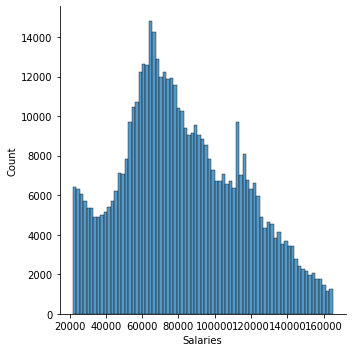

In [86]:
plt.figure(figsize=(20,4))
sns.displot(df_salary[ori_col[13]],bins=75,kind='hist')
plt.show()

In [87]:
# df[ori_col[13]] = df_salary[ori_col[13]]

In [88]:
# df = df.drop("Job",1)

In [89]:
# df

### Overtime

#### Overtime Amounts paid to City employees working in excess of 40 hours per week.



In [90]:
desc_feat(data,ori_col[14])

***********************************
Overtime
Describe 

count    515705.000000
mean       7054.838182
std       14501.186910
min      -12308.660000
25%           0.000000
50%         337.940000
75%        7529.150000
max      321523.310000
Name: Overtime, dtype: float64
Value Count 

0.00        230017
47.50           89
2.49            81
0.01            53
4.84            47
             ...  
30953.58         1
2136.02          1
11546.44         1
380.93           1
1921.92          1
Name: Overtime, Length: 246848, dtype: int64
Amount of NuLL:
0
***********************************


In [91]:
df_overtime = pd.DataFrame()
df_overtime[ori_col[14]] = data[ori_col[14]]
#df_salary.min()

In [92]:
min_ot = int(df_overtime.mean()) - int(df_overtime.std()) * 1
max_ot = int(df_overtime.mean()) + int(df_overtime.std()) * 1
min_ot, max_ot

(-7447, 21555)

In [93]:
df_overtime = df_overtime[df_overtime[ori_col[14]] > min_ot]
df_overtime = df_overtime[df_overtime[ori_col[14]] < max_ot]

In [94]:
df_overtime.describe()

,Overtime
count,460889.000000
mean,2997.395506
std,5077.338644
min,-892.500000
25%,0.000000
50%,0.620000
75%,4002.030000
max,21554.740000


In [95]:
data = data[data[ori_col[14]] > min_ot]
data = data[data[ori_col[14]] < max_ot]

In [96]:
data

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
5,1,1000,1064,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,36223,34456.00,0.0,0.00,34456.00,7346.00,3827.63,2579.95,13753.58,48209.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683271,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42444671,105738.31,303.6,0.00,106041.91,22038.95,15451.43,8406.34,45896.72,151938.63
683272,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43836214,98444.94,0.0,0.00,98444.94,20540.24,15275.18,8019.49,43834.91,142279.85
683274,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,44016180,96475.00,0.0,576.00,97051.00,20241.56,14100.16,7897.00,42238.72,139289.72
683275,6,4300,4337,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42423439,115943.00,0.0,0.00,115943.00,24188.37,15275.18,9018.34,48481.89,164424.89


In [97]:
# df_overtime = df_overtime.drop(df_overtime[df_overtime[ori_col[14]] <= 0].index,0)
# data = data.drop(data[data[ori_col[14]] <= 0].index,0)

<Figure size 1440x288 with 0 Axes>

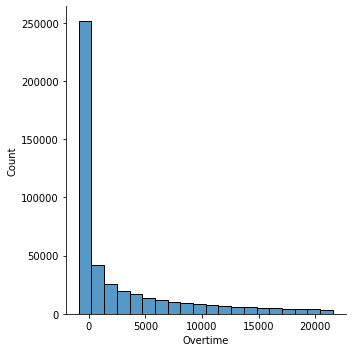

In [98]:
plt.figure(figsize=(20,4))
sns.displot(data=data, x=ori_col[14],bins=20,kind='hist')
plt.show()

### Other Salaries

#### Other Salaries Various irregular payments made to City employees including premium pay, incentive pay, or other one-time payments.



In [104]:
desc_feat(data,ori_col[15])

***********************************
Other Salaries
Describe 

count    460889.000000
mean       3716.160264
std        7830.516374
min      -19131.100000
25%           0.000000
50%        1050.720000
75%        4379.700000
max      568163.120000
Name: Other Salaries, dtype: float64
Value Count 

0.00       141024
624.00       8048
250.00       2902
626.40       1742
1040.00       993
            ...  
7250.45         1
4634.73         1
4651.67         1
3611.67         1
738.50          1
Name: Other Salaries, Length: 225956, dtype: int64
Amount of NuLL:
0
***********************************


In [105]:
df_othersal = pd.DataFrame()
df_othersal[ori_col[15]] = data[ori_col[15]]
#df_salary.min()

In [106]:
min_os = int(df_othersal.mean()) -int(df_othersal.std()) * 1
max_os = int(df_othersal.mean()) + int(df_othersal.std()) * 1
min_os,max_os

(-4114, 11546)

In [107]:

df_othersal = df_othersal[df_othersal[ori_col[15]] > min_os]
df_othersal = df_othersal[df_othersal[ori_col[15]] < max_os]

In [108]:
df_othersal.describe()

,Other Salaries
count,421100.000000
mean,2040.749389
std,2761.291330
min,-2212.850000
25%,0.000000
50%,780.000000
75%,3004.955000
max,11545.930000


In [109]:

data = data[data[ori_col[15]] > min_os]
data = data[data[ori_col[15]] < max_os]

In [110]:
# df_othersal = df_othersal.drop(df_othersal[df_othersal[ori_col[15]] <= 0].index,0)
# data = data.drop(data[data[ori_col[15]] <= 0].index,0)

<Figure size 360x288 with 0 Axes>

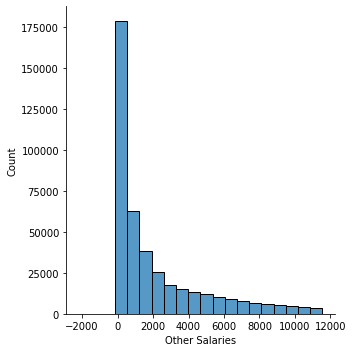

In [111]:
plt.figure(figsize=(5,4))
sns.displot(df_othersal[ori_col[15]],bins=20,kind='hist')
plt.show()

### Total Salary
##### Total Salary The sum of all salaries paid to City employees.



In [112]:
desc_feat(data,ori_col[16])

***********************************
Total Salary
Describe 

count    421100.000000
mean      81970.171365
std       32867.971747
min       21594.070000
25%       59226.942500
50%       78478.005000
75%      102885.525000
max      195296.520000
Name: Total Salary, dtype: float64
Value Count 

114480.00    66
112816.00    58
35878.50     46
111155.00    45
116192.00    43
             ..
69807.73      1
95974.07      1
74770.53      1
138123.64     1
99849.01      1
Name: Total Salary, Length: 388177, dtype: int64
Amount of NuLL:
0
***********************************


In [113]:
df_totsal = pd.DataFrame()
df_totsal[ori_col[16]] = data[ori_col[16]]
#df_salary.min()

In [114]:
df_totsal = df_totsal.drop(df_totsal[df_totsal[ori_col[16]] < 0].index)

<Figure size 360x288 with 0 Axes>

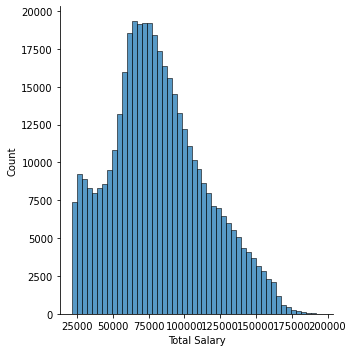

In [115]:
plt.figure(figsize=(5,4))
sns.displot(df_totsal[ori_col[16]],bins=50,kind='hist')
plt.show()

In [116]:
#drop_cols.append(ori_col[16])

### Retirement

#### Retirement City contributions to employee retirement plans.



In [117]:
desc_feat(data,ori_col[17])

***********************************
Retirement
Describe 

count    421100.000000
mean      15147.657274
std        6784.134991
min      -29629.210000
25%       11279.240000
50%       14783.840000
75%       19423.915000
max       58019.450000
Name: Retirement, dtype: float64
Value Count 

0.00        14128
11473.70       93
11954.96       90
24710.91       88
12513.52       87
            ...  
17643.74        1
16677.99        1
5952.52         1
7454.18         1
21590.39        1
Name: Retirement, Length: 319538, dtype: int64
Amount of NuLL:
0
***********************************


In [118]:
df_retire = pd.DataFrame()
df_retire[ori_col[17]] = data[ori_col[17]]
#df_salary.min()



In [119]:
min_retire = int(df_retire.mean()) - int(df_retire.std()) * 1
max_retire = int(df_retire.mean()) + int(df_retire.std()) * 1
min_retire,max_retire

(8363, 21931)

In [120]:

df_retire = df_retire[df_retire[ori_col[17]] > min_retire]
df_retire = df_retire[df_retire[ori_col[17]] < max_retire]

In [121]:
df_retire.describe()

,Retirement
count,292875.000000
mean,15011.972579
std,3414.844644
min,8363.570000
25%,12324.605000
50%,14720.540000
75%,17653.755000
max,21930.810000


<Figure size 360x288 with 0 Axes>

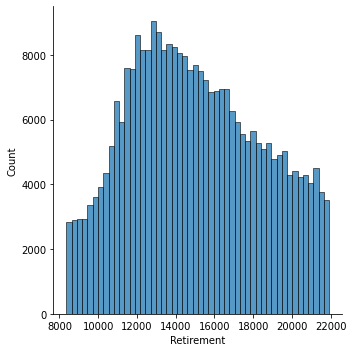

In [122]:
plt.figure(figsize=(5,4))
sns.displot(df_retire[ori_col[17]],bins=50,kind='hist')
plt.show()

In [123]:
data = data[data[ori_col[17]] > min_retire]
data = data[data[ori_col[17]] < max_retire]

In [124]:
data

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.00,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.00,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.00,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
7,1,1000,1094,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,46572.00,0.00,0.00,46572.00,9929.16,5741.44,3822.28,19492.88,66064.88
8,1,1200,1232,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37983,84681.53,0.00,0.00,84681.53,16661.84,12918.24,6838.44,36418.52,121100.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683268,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42424433,89518.56,1668.76,0.00,91187.32,18677.94,15275.18,7210.77,41163.89,132351.21
683269,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42442020,103094.46,1707.72,84.29,104886.47,21527.88,15256.82,8375.05,45159.75,150046.22
683270,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,42442572,104571.01,0.00,0.00,104571.01,21815.88,15275.18,8449.21,45540.27,150111.28
683272,6,4300,4334,Fiscal,2020,General Administration & Finance,TTX,Treasurer/Tax Collector,790.0,"SEIU, Local 1021, Misc",...,43836214,98444.94,0.00,0.00,98444.94,20540.24,15275.18,8019.49,43834.91,142279.85


### Health and Dental
#### Health and Dental City-paid premiums to health and dental insurance plans covering City employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits.

In [125]:
desc_feat(data,ori_col[18])

***********************************
Health and Dental
Describe 

count    292875.000000
mean      12717.664836
std        2702.192020
min        -193.950000
25%       12376.730000
50%       13054.960000
75%       14180.580000
max       44921.800000
Name: Health and Dental, dtype: float64
Value Count 

13371.04    7276
12801.79    6589
12424.50    6500
12918.24    6460
13054.94    6194
            ... 
10090.00       1
14188.24       1
10393.09       1
12817.44       1
16292.67       1
Name: Health and Dental, Length: 102533, dtype: int64
Amount of NuLL:
0
***********************************


In [126]:
df_ins = pd.DataFrame()
df_ins[ori_col[18]] = data[ori_col[18]]
#df_salary.min()




In [127]:
df_ins.describe()

,Health and Dental
count,292875.000000
mean,12717.664836
std,2702.192020
min,-193.950000
25%,12376.730000
50%,13054.960000
75%,14180.580000
max,44921.800000


In [128]:
min_oth = int(df_ins.mean()) - int(df_ins.std()) * 1
max_oth = int(df_ins.mean()) + int(df_ins.std()) * 1
min_oth,max_oth

(10015, 15419)

In [129]:
df_ins = df_ins[df_ins[ori_col[18]] > min_oth]
df_ins = df_ins[df_ins[ori_col[18]] < max_oth]


In [130]:
df_ins.describe()

,Health and Dental
count,241278.000000
mean,13235.954333
std,1158.422211
min,10015.110000
25%,12510.572500
50%,13068.000000
75%,14138.790000
max,15418.940000


<Figure size 360x288 with 0 Axes>

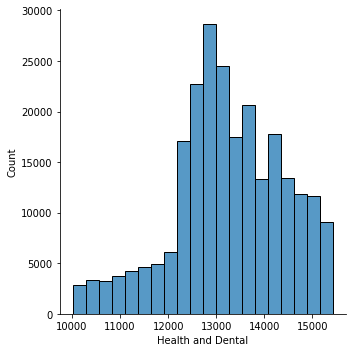

In [131]:
plt.figure(figsize=(5,4))
sns.displot(df_ins[ori_col[18]],bins=20,kind='hist')
plt.show()

In [132]:
data = data[data[ori_col[18]] > min_oth]
data = data[data[ori_col[18]] < max_oth]


### Other Benefits Mandatory benefits 

#### paid on behalf of employees, such as Social Security (FICA and Medicare) contributions, unemployment insurance premiums, and minor discretionary benefits not included in the above categories.

In [133]:
desc_feat(data,ori_col[19])

***********************************
Other Benefits
Describe 

count    241278.000000
mean       6128.954275
std        1945.005397
min       -9697.770000
25%        5050.510000
50%        6070.545000
75%        7254.297500
max       35142.960000
Name: Other Benefits, dtype: float64
Value Count 

4985.61    20
6318.61    20
5380.02    19
6663.41    18
6257.03    17
           ..
3819.19     1
7628.84     1
1962.80     1
7927.33     1
5791.09     1
Name: Other Benefits, Length: 195507, dtype: int64
Amount of NuLL:
0
***********************************


In [134]:
df_other = pd.DataFrame()
df_other[ori_col[19]] = data[ori_col[19]]
#df_salary.min()



In [135]:
min_other = int(df_other.mean()) - int(df_other.std()) * 1
max_other = int(df_other.mean()) + int(df_other.std()) * 1
min_other,max_other

(4183, 8073)

In [136]:

df_other = df_other[df_other[ori_col[19]] > min_other]
df_other = df_other[df_other[ori_col[19]] < max_other]

In [137]:

data = data[data[ori_col[19]] > min_other]
data = data[data[ori_col[19]] < max_other]

In [138]:
df_other.describe()

,Other Benefits
count,186023.000000
mean,6066.865795
std,1019.131767
min,4183.020000
25%,5235.240000
50%,6016.640000
75%,6872.630000
max,8072.970000


<Figure size 360x288 with 0 Axes>

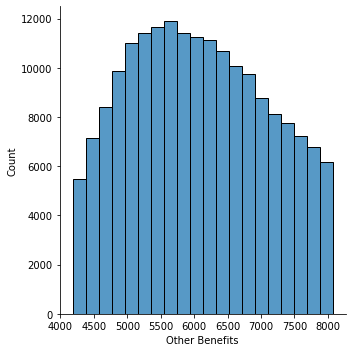

In [139]:
plt.figure(figsize=(5,4))
sns.displot(df_other[ori_col[19]],bins=20,kind='hist')
plt.show()

### Total Benefits 
#### The sum of all benefits paid to City employees.

In [140]:
desc_feat(data,ori_col[20])

***********************************
Total Benefits
Describe 

count    186023.000000
mean      33983.074090
std        3835.080283
min       23032.220000
25%       31060.050000
50%       33825.960000
75%       36839.610000
max       45158.850000
Name: Total Benefits, dtype: float64
Value Count 

30710.41    18
31230.15    18
34828.91    17
35311.48    17
37461.33    17
            ..
35044.09     1
27902.93     1
36109.81     1
41769.88     1
35053.98     1
Name: Total Benefits, Length: 172552, dtype: int64
Amount of NuLL:
0
***********************************


<Figure size 360x288 with 0 Axes>

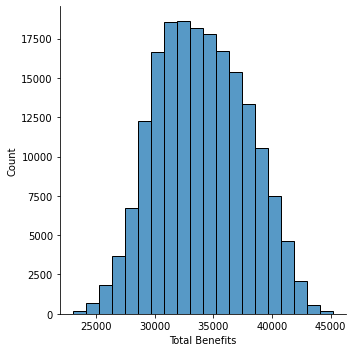

In [141]:
df_totbene = pd.DataFrame()
df_totbene[ori_col[20]] = data[ori_col[20]]
#df_salary.min()

df_totbene =  df_totbene.drop(df_totbene[df_totbene[ori_col[20]] < 0].index)

plt.figure(figsize=(5,4))
sns.displot(df_totbene[ori_col[20]],bins=20,kind='hist')
plt.show()

In [142]:
# drop_cols.append(ori_col[20])

### Total Compensation 

#### The sum of all salaries and benefits paid to City employees.



In [143]:
desc_feat(data,ori_col[21])

***********************************
Total Compensation
Describe 

count    186023.000000
mean     109938.525466
std       16282.748909
min       68961.100000
25%       96674.460000
50%      109251.110000
75%      122696.040000
max      205011.570000
Name: Total Compensation, dtype: float64
Value Count 

133651.06    9
96293.00     8
109758.77    7
92805.35     7
110293.50    7
            ..
107650.30    1
114545.69    1
77805.33     1
109437.11    1
129583.51    1
Name: Total Compensation, Length: 182257, dtype: int64
Amount of NuLL:
0
***********************************


<Figure size 360x288 with 0 Axes>

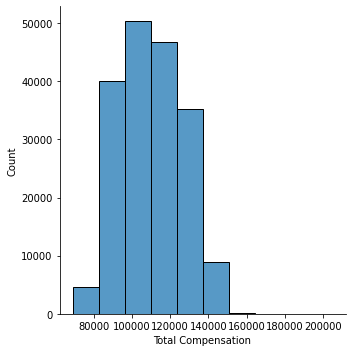

In [144]:
df_totcomp = pd.DataFrame()
df_totcomp[ori_col[21]] = data[ori_col[21]]
#df_salary.min()

df_totcomp =  df_totcomp.drop(df_totcomp[df_totcomp[ori_col[21]] < 0].index)

plt.figure(figsize=(5,4))
sns.displot(df_totcomp[ori_col[21]],bins=10,kind='hist')
plt.show()

In [145]:
df = data.copy()

In [146]:
df.drop(drop_cols,1,inplace=True)

In [147]:
df.head()

,Organization Group Code,Job Family Code,Year,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits
0,1,1000,2013,21.0,57534.65,0.0,0.0,11253.16,11961.34,4532.63
2,1,1000,2013,21.0,63532.93,0.0,0.0,12495.83,12918.24,4702.71
8,1,1200,2013,21.0,84681.53,0.0,0.0,16661.84,12918.24,6838.44
15,1,1800,2013,21.0,91826.22,0.0,0.0,18072.56,12918.24,7811.62
16,1,1800,2013,21.0,77486.52,0.0,0.0,14861.12,10047.52,6402.01


In [148]:
df = df.drop("Year",1)

In [149]:
df.shape

(186023, 9)

In [150]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186023 entries, 0 to 683274
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  186023 non-null  int64  
 1   Job Family Code          186023 non-null  int64  
 2   Union Code               186023 non-null  float64
 3   Salaries                 186023 non-null  float64
 4   Overtime                 186023 non-null  float64
 5   Other Salaries           186023 non-null  float64
 6   Retirement               186023 non-null  float64
 7   Health and Dental        186023 non-null  float64
 8   Other Benefits           186023 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 18.2 MB


In [151]:
# df = pd.get_dummies(df,drop_first=True)

In [152]:
# # df = df.rename(columns={"Organization Group_Public Works, Transportation & Commerce":"Org_Pub_work_trans", 
#                    "Organization Group_Community Health": "Org_com_health",                          
#                    "Organization Group_Public Protection": "Org_pub_protection",                        
#                    "Organization Group_Culture & Recreation": "Org_gen_admin_finance",                  
#                    "Organization Group_General Administration & Finance": "Org_gen_admin",           
#                    "Organization Group_Human Welfare & Neighborhood Development" : "Org_human",   
#                    "Organization Group_General City Responsibilities" : "Org_general_city",
#                     "Year Type_Fiscal": "Is_Fiscal"})

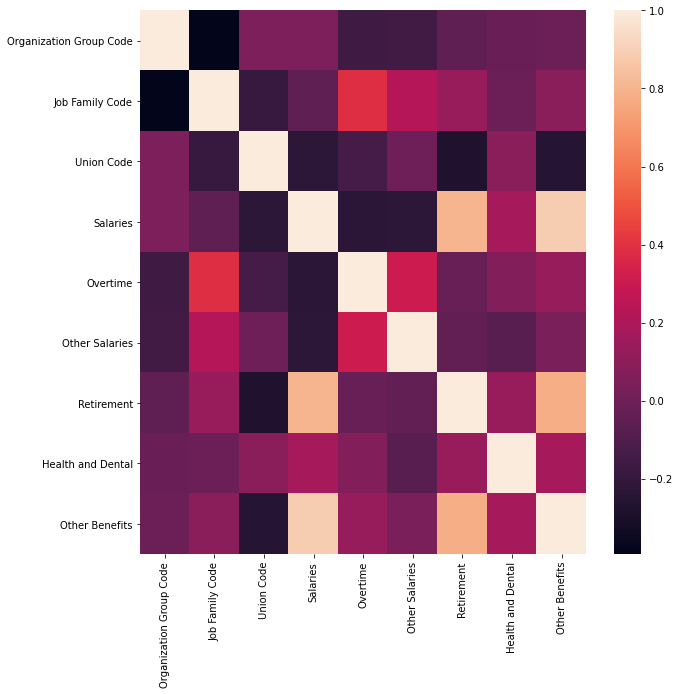

In [153]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

<AxesSubplot:>

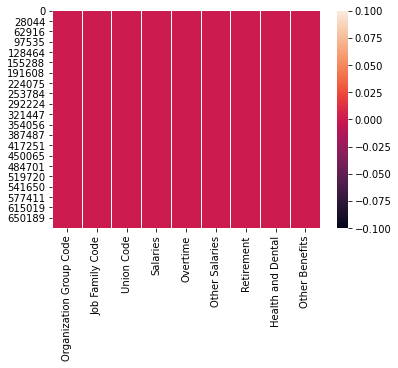

In [154]:
sns.heatmap(df.isna())


In [155]:
df.describe()

,Organization Group Code,Job Family Code,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits
count,186023.00000,186023.000000,186023.000000,186023.000000,186023.000000,186023.000000,186023.000000,186023.000000,186023.000000
mean,3.16098,4299.392102,472.615849,71459.374475,2719.587044,1789.250668,14654.674583,13261.533711,6066.865795
std,1.45466,2887.693837,308.161917,13174.107055,4683.588621,2296.596174,2634.142887,1141.406044,1019.131767
min,1.00000,0.000000,1.000000,34974.050000,-284.130000,-1060.000000,8363.720000,10015.220000,4183.020000
25%,2.00000,2100.000000,250.000000,61213.635000,0.000000,0.000000,12612.610000,12512.540000,5235.240000
50%,3.00000,2900.000000,535.000000,69727.800000,60.050000,873.500000,14363.500000,13080.050000,6016.640000
75%,4.00000,7300.000000,790.000000,81133.340000,3515.910000,2502.145000,16521.915000,14138.790000,6872.630000
max,6.00000,9900.000000,965.000000,163595.070000,21554.530000,11543.960000,21930.470000,15418.940000,8072.970000


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186023 entries, 0 to 683274
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  186023 non-null  int64  
 1   Job Family Code          186023 non-null  int64  
 2   Union Code               186023 non-null  float64
 3   Salaries                 186023 non-null  float64
 4   Overtime                 186023 non-null  float64
 5   Other Salaries           186023 non-null  float64
 6   Retirement               186023 non-null  float64
 7   Health and Dental        186023 non-null  float64
 8   Other Benefits           186023 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 18.2 MB


In [157]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans



In [158]:
drop_col = ['Organization Group Code', 'Job Family Code', 'Union Code']

In [159]:

K = range(1,10)
# X = df.drop([df_col[1],df_col[10],df_col[11],df_col[12], df_col[13], df_col[14], 
#                      df_col[15],df_col[16], df_col[17], df_col[18], df_col[19]],1)
# X = df.loc[:,:]
X = df.drop(drop_col,1)


KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

In [160]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [161]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    # kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

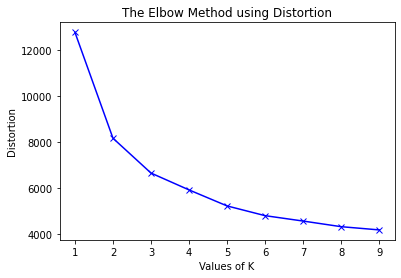

In [162]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [163]:

for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 39073474485597.805
2 : 15443409847704.508
3 : 10320176962293.232
4 : 8101625280672.1875
5 : 6309372086401.3545
6 : 5417397875104.209
7 : 4798319993765.684
8 : 4360618289182.188
9 : 4029331322995.064


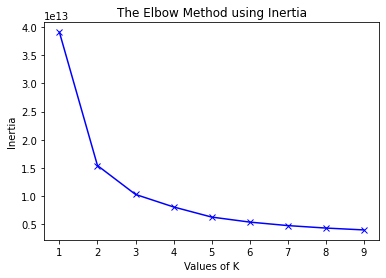

In [164]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [165]:
kmean = KMeans(n_clusters=3)
kmean.fit(X)

KMeans(n_clusters=3)

In [166]:
y = kmean.labels_

In [167]:
kmean.cluster_centers_

array([[57844.93943077,  3138.80078587,  2184.79362989, 12325.90467267,
        12977.68331037,  5060.73766964],
       [89333.4372513 ,   744.74222199,   985.74608127, 17549.38384292,
        13451.16720428,  7260.93013691],
       [71821.9903097 ,  3658.00857772,  1968.17427195, 14825.1448252 ,
        13391.1042812 ,  6178.22972689]])

In [168]:
df["cluster"] = y

In [169]:
df

,Organization Group Code,Job Family Code,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,cluster
0,1,1000,21.0,57534.65,0.00,0.00,11253.16,11961.34,4532.63,0
2,1,1000,21.0,63532.93,0.00,0.00,12495.83,12918.24,4702.71,0
8,1,1200,21.0,84681.53,0.00,0.00,16661.84,12918.24,6838.44,1
15,1,1800,21.0,91826.22,0.00,0.00,18072.56,12918.24,7811.62,1
16,1,1800,21.0,77486.52,0.00,0.00,14861.12,10047.52,6402.01,2
...,...,...,...,...,...,...,...,...,...,...
683264,6,4300,790.0,68424.26,419.20,0.00,14358.87,15275.18,5402.47,2
683265,6,4300,790.0,54954.97,505.88,6047.79,11557.05,12017.08,4744.02,0
683268,6,4300,790.0,89518.56,1668.76,0.00,18677.94,15275.18,7210.77,1
683272,6,4300,790.0,98444.94,0.00,0.00,20540.24,15275.18,8019.49,1


<AxesSubplot:ylabel='count'>

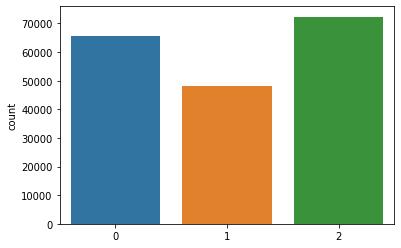

In [170]:
sns.countplot(x=y)

In [171]:
df.columns

Index(['Organization Group Code', 'Job Family Code', 'Union Code', 'Salaries',
       'Overtime', 'Other Salaries', 'Retirement', 'Health and Dental',
       'Other Benefits', 'cluster'],
      dtype='object')

<AxesSubplot:xlabel='Job Family Code', ylabel='Salaries'>

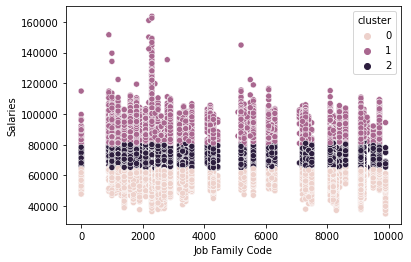

In [172]:
sns.scatterplot(data=df,x="Job Family Code",y="Salaries", hue='cluster')


<Figure size 7200x7200 with 0 Axes>

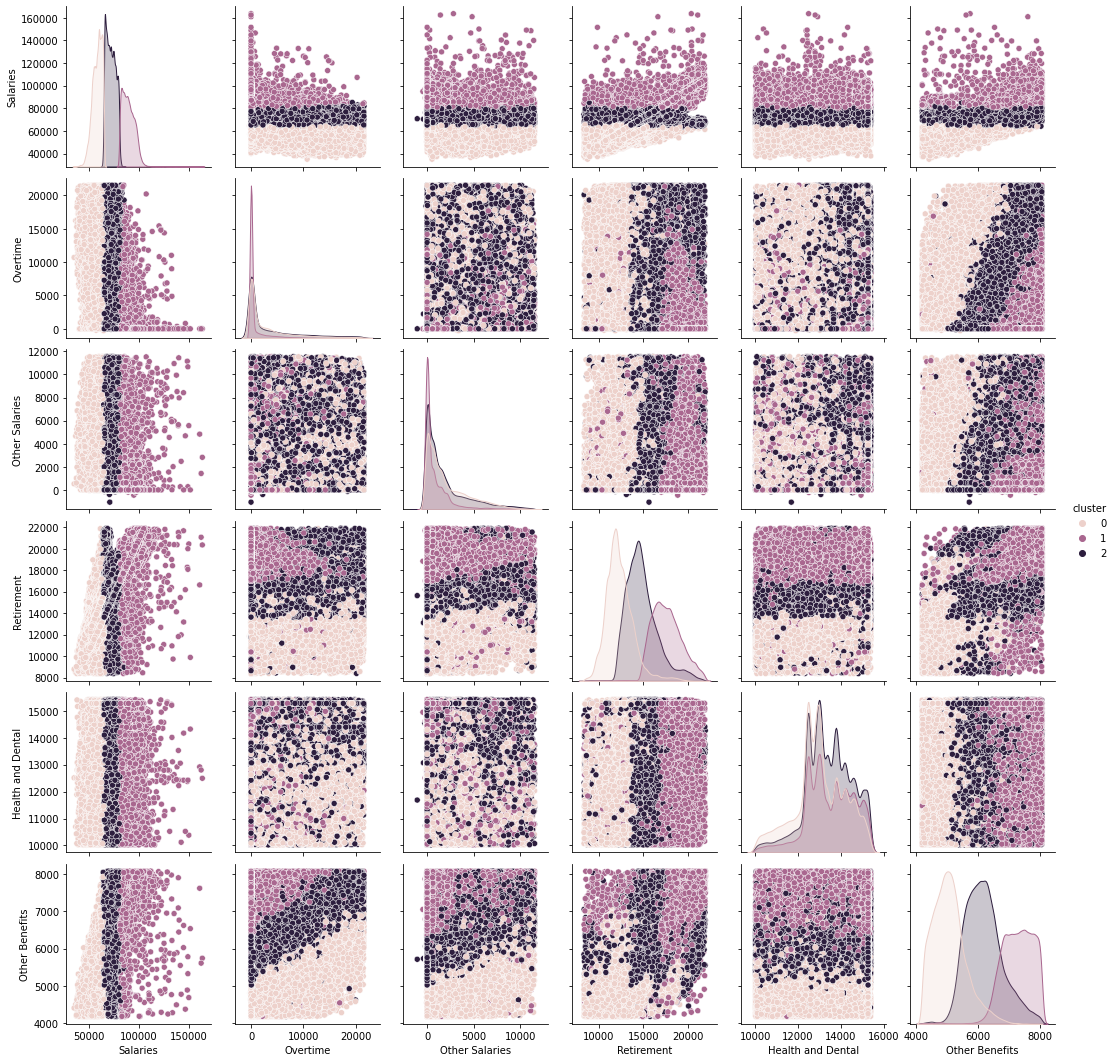

In [173]:
plt.figure(figsize=(100,100))
sns.pairplot(data=df.drop(drop_col,1), hue='cluster')

plt.show()

In [174]:
df.groupby(by='cluster').head()

,Organization Group Code,Job Family Code,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,cluster
0,1,1000,21.0,57534.65,0.0,0.00,11253.16,11961.34,4532.63,0
2,1,1000,21.0,63532.93,0.0,0.00,12495.83,12918.24,4702.71,0
8,1,1200,21.0,84681.53,0.0,0.00,16661.84,12918.24,6838.44,1
15,1,1800,21.0,91826.22,0.0,0.00,18072.56,12918.24,7811.62,1
16,1,1800,21.0,77486.52,0.0,0.00,14861.12,10047.52,6402.01,2
18,1,1800,21.0,88016.50,0.0,0.00,17332.00,12918.24,6760.28,1
19,1,1800,21.0,91540.61,0.0,0.00,18011.68,12918.24,7268.43,1
20,1,1800,21.0,101787.06,0.0,0.00,20042.02,12918.24,7988.47,1
25,1,1400,22.0,67071.60,0.0,2077.06,12973.88,10744.27,5439.34,2
132,1,1400,790.0,58697.17,0.0,1367.23,11790.73,10510.43,5012.02,0


In [175]:
df_c0 = df[df["cluster"] ==  0]
df_c1 = df[df["cluster"] ==  1]
df_c2 = df[df["cluster"] ==  2]

In [176]:

df_c0.head()

,Organization Group Code,Job Family Code,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,cluster
0,1,1000,21.0,57534.65,0.0,0.00,11253.16,11961.34,4532.63,0
2,1,1000,21.0,63532.93,0.0,0.00,12495.83,12918.24,4702.71,0
132,1,1400,790.0,58697.17,0.0,1367.23,11790.73,10510.43,5012.02,0
135,1,1400,790.0,54756.02,0.0,1608.00,11075.22,12918.24,4590.99,0
137,1,1400,790.0,54132.92,0.0,640.64,10768.65,12771.24,4442.71,0


In [177]:
df_c1.head()

,Organization Group Code,Job Family Code,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,cluster
8,1,1200,21.0,84681.53,0.0,0.0,16661.84,12918.24,6838.44,1
15,1,1800,21.0,91826.22,0.0,0.0,18072.56,12918.24,7811.62,1
18,1,1800,21.0,88016.50,0.0,0.0,17332.00,12918.24,6760.28,1
19,1,1800,21.0,91540.61,0.0,0.0,18011.68,12918.24,7268.43,1
20,1,1800,21.0,101787.06,0.0,0.0,20042.02,12918.24,7988.47,1


In [178]:
df_c2.head()

,Organization Group Code,Job Family Code,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,cluster
16,1,1800,21.0,77486.52,0.0,0.00,14861.12,10047.52,6402.01,2
25,1,1400,22.0,67071.60,0.0,2077.06,12973.88,10744.27,5439.34,2
133,1,1400,790.0,71363.00,0.0,0.00,14039.70,12624.36,5551.19,2
143,1,1800,790.0,71626.42,0.0,0.00,14085.42,12902.64,5564.60,2
202,1,1111,23.0,70166.93,0.0,6310.93,13490.41,10597.75,6306.78,2


In [179]:
df_c0.describe()

,Organization Group Code,Job Family Code,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,cluster
count,65461.000000,65461.000000,65461.000000,65461.000000,65461.000000,65461.000000,65461.000000,65461.000000,65461.000000,65461.0
mean,3.174852,4104.760575,549.308749,57859.887164,3146.114781,2185.729158,12329.898856,12978.304742,5062.524749,0.0
std,1.405810,2847.858489,272.209039,4711.107874,4750.011751,2330.933844,1559.890266,1168.029523,531.759465,0.0
min,1.000000,0.000000,1.000000,34974.050000,-284.130000,-54.300000,8363.720000,10015.430000,4183.020000,0.0
25%,2.000000,2300.000000,253.000000,54602.900000,0.000000,440.370000,11344.450000,12424.500000,4672.690000,0.0
50%,3.000000,2700.000000,790.000000,58571.400000,715.240000,1358.280000,12109.560000,12918.240000,5011.580000,0.0
75%,4.000000,7500.000000,790.000000,61695.730000,4368.670000,3429.940000,13112.910000,13838.210000,5349.820000,0.0
max,6.000000,9900.000000,965.000000,65670.870000,21553.140000,11543.960000,21877.320000,15417.600000,7913.790000,0.0


In [180]:
df_c1.describe()

,Organization Group Code,Job Family Code,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,cluster
count,48209.000000,48209.000000,48209.000000,48209.000000,48209.000000,48209.000000,48209.000000,48209.000000,48209.000000,48209.0
mean,3.324836,3905.532639,368.993362,89346.515861,743.263864,984.697414,17552.116697,13451.378509,7261.878349,1.0
std,1.522286,2523.770521,340.821728,6086.033797,2043.018852,1782.484526,1688.796878,1110.864357,513.395651,0.0
min,1.000000,0.000000,1.000000,79700.000000,0.000000,-455.890000,8369.370000,10019.090000,4184.610000,1.0
25%,2.000000,1800.000000,21.000000,84387.640000,0.000000,0.000000,16340.860000,12660.440000,6898.690000,1.0
50%,3.000000,2900.000000,251.000000,88635.610000,0.000000,25.000000,17418.850000,13371.040000,7292.220000,1.0
75%,4.000000,5300.000000,790.000000,93634.010000,18.400000,1303.350000,18651.710000,14271.540000,7671.160000,1.0
max,6.000000,9900.000000,965.000000,163595.070000,21546.610000,11533.850000,21930.470000,15416.840000,8072.970000,1.0


In [181]:
df_c2.describe()

,Organization Group Code,Job Family Code,Union Code,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits,cluster
count,72353.000000,72353.000000,72353.000000,72353.000000,72353.000000,72353.000000,72353.000000,72353.000000,72353.000000,72353.0
mean,3.039252,4737.913590,472.272290,71845.189020,3650.517784,1966.614833,14827.429785,13391.289543,6179.298022,2.0
std,1.440659,3086.739441,295.374014,4560.796126,5437.900914,2433.730335,1795.727919,1086.102684,601.776950,0.0
min,1.000000,0.000000,1.000000,63144.470000,-121.200000,-1060.000000,8364.050000,10015.220000,4184.680000,2.0
25%,2.000000,2100.000000,250.000000,67808.220000,0.000000,10.000000,13583.880000,12702.440000,5742.830000,2.0
50%,3.000000,3200.000000,535.000000,71587.480000,504.000000,1016.450000,14540.600000,13371.040000,6125.040000,2.0
75%,4.000000,8100.000000,790.000000,75549.950000,5523.840000,2769.770000,15706.130000,14168.910000,6522.770000,2.0
max,6.000000,9900.000000,965.000000,85150.000000,21554.530000,11541.660000,21923.090000,15418.940000,8072.920000,2.0


In [182]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [183]:

from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [184]:
df1 = df.drop(["Organization Group Code","Job Family Code","Union Code","cluster"],1)
df1

,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits
0,57534.65,0.00,0.00,11253.16,11961.34,4532.63
2,63532.93,0.00,0.00,12495.83,12918.24,4702.71
8,84681.53,0.00,0.00,16661.84,12918.24,6838.44
15,91826.22,0.00,0.00,18072.56,12918.24,7811.62
16,77486.52,0.00,0.00,14861.12,10047.52,6402.01
...,...,...,...,...,...,...
683264,68424.26,419.20,0.00,14358.87,15275.18,5402.47
683265,54954.97,505.88,6047.79,11557.05,12017.08,4744.02
683268,89518.56,1668.76,0.00,18677.94,15275.18,7210.77
683272,98444.94,0.00,0.00,20540.24,15275.18,8019.49


In [185]:
df1.describe()

,Salaries,Overtime,Other Salaries,Retirement,Health and Dental,Other Benefits
count,186023.000000,186023.000000,186023.000000,186023.000000,186023.000000,186023.000000
mean,71459.374475,2719.587044,1789.250668,14654.674583,13261.533711,6066.865795
std,13174.107055,4683.588621,2296.596174,2634.142887,1141.406044,1019.131767
min,34974.050000,-284.130000,-1060.000000,8363.720000,10015.220000,4183.020000
25%,61213.635000,0.000000,0.000000,12612.610000,12512.540000,5235.240000
50%,69727.800000,60.050000,873.500000,14363.500000,13080.050000,6016.640000
75%,81133.340000,3515.910000,2502.145000,16521.915000,14138.790000,6872.630000
max,163595.070000,21554.530000,11543.960000,21930.470000,15418.940000,8072.970000


In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186023 entries, 0 to 683274
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Salaries           186023 non-null  float64
 1   Overtime           186023 non-null  float64
 2   Other Salaries     186023 non-null  float64
 3   Retirement         186023 non-null  float64
 4   Health and Dental  186023 non-null  float64
 5   Other Benefits     186023 non-null  float64
dtypes: float64(6)
memory usage: 14.0 MB


In [187]:
df1.isna().sum()

Salaries             0
Overtime             0
Other Salaries       0
Retirement           0
Health and Dental    0
Other Benefits       0
dtype: int64

Z-Shape: (19999, 4)


TypeError: object of type 'NoneType' has no len()

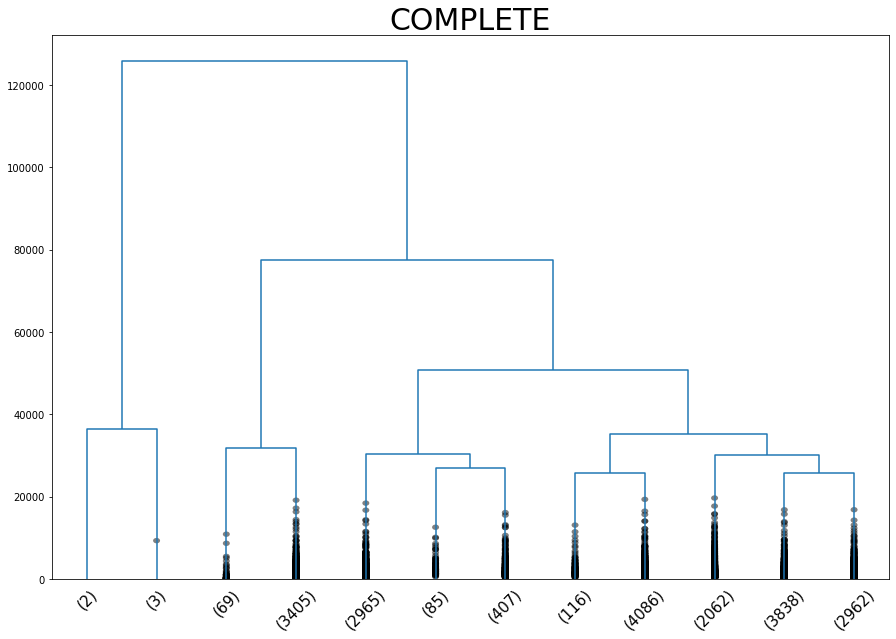

In [188]:
plt.figure(figsize=(15,10))
Z=linkage(df1.iloc[:20000,:],method='complete')
print("Z-Shape:",Z.shape)
plt.title("COMPLETE",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,color_threshold=1)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

In [ ]:
# plt.figure(figsize=(15,10))
# Z=linkage(df1.iloc[:20000,:],method='single')
# print("Z-Shape:",Z.shape)
# plt.title("Single",size=30)
# dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
# plt.xlabel("Cluster Size",fontsize=30)
# plt.ylabel("Distances",fontsize=30)
# plt.show()

Z-Shape: (19999, 4)


TypeError: object of type 'NoneType' has no len()

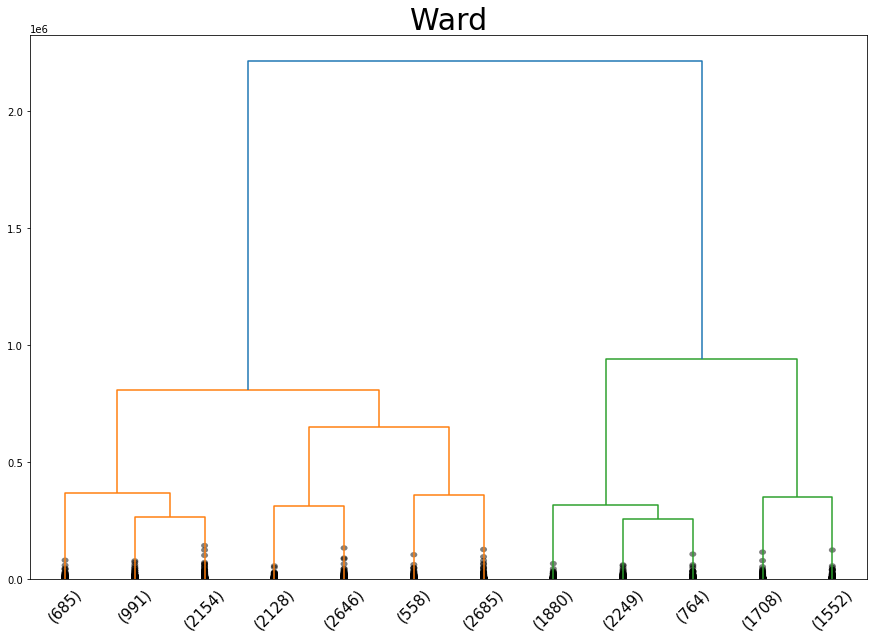

In [190]:
plt.figure(figsize=(15,10))
Z=linkage(df1.iloc[:20000,:],method='ward')
print("Z-Shape:",Z.shape)
plt.title("Ward",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

Z-Shape: (19999, 4)


TypeError: object of type 'NoneType' has no len()

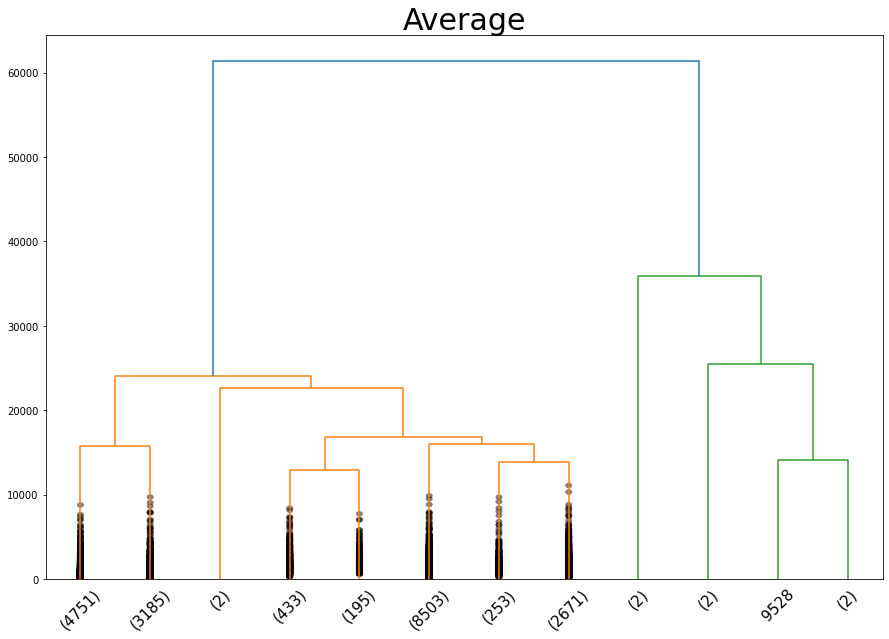

In [191]:
plt.figure(figsize=(15,10))
Z=linkage(df1.iloc[:20000,:],method='average')
print("Z-Shape:",Z.shape)
plt.title("Average",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

Z-Shape: (19999, 4)


TypeError: object of type 'NoneType' has no len()

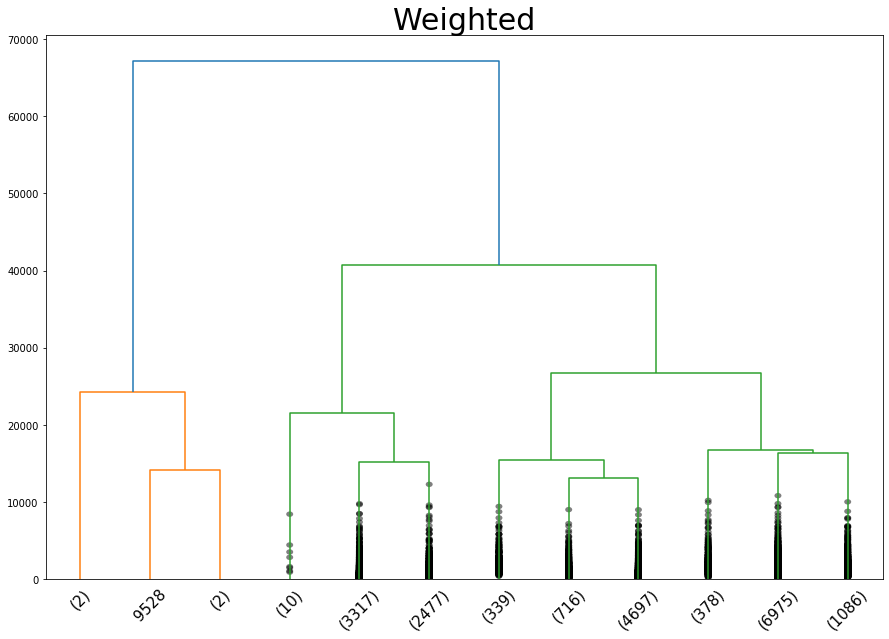

In [192]:
plt.figure(figsize=(15,10))
Z=linkage(df1.iloc[:20000,:],method='weighted')
print("Z-Shape:",Z.shape)
plt.title("Weighted",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

In [ ]:
drop_cols

In [ ]:
# plt.figure(figsize=(15,10))
# # Z=linkage(df,method='single')
# print("Z-Shape:",Z.shape)
# plt.title("Single",size=30)
# dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
# plt.xlabel("Cluster Size",fontsize=30)
# plt.ylabel("Distances",fontsize=30)
# plt.show()
